In [2]:
import pickle as pkl


In [3]:
objects = []
with (open("../extracao/vgg16.pkl", "rb")) as openfile:
    while True:
        try:
            objects.append(pkl.load(openfile))
        except EOFError:
            break


In [4]:
import pandas as pd

In [5]:
import os
import sys
from time import time

import pandas as pd
import numpy as np


from sklearn.pipeline import make_pipeline


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.utils import shuffle

import mlflow
from mlflow.tracking import MlflowClient


import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import make_pipeline


In [7]:
from sklearn.decomposition import PCA

In [8]:
X = pd.DataFrame([o[1] for o in objects])

In [8]:
X

0         1         2         3         4         5         6     \
0      0.000000  0.000000  0.000000  0.000000  0.563937  0.000000  0.000000   
1      1.234399  0.865545  1.106845  0.000000  3.255290  1.038765  0.000000   
2      3.036267  0.000000  0.000000  0.000000  3.894413  3.429538  0.000000   
3      0.029929  0.000000  0.000000  0.000000  1.533260  0.000000  0.000000   
4      0.000000  0.000000  0.000000  0.132773  0.000000  0.580434  0.000000   
...         ...       ...       ...       ...       ...       ...       ...   
10068  0.000000  0.024616  4.775819  0.000000  3.782488  0.000000  7.282493   
10069  0.000000  0.000000  3.098676  0.000000  0.000000  0.000000  0.000000   
10070  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
10071  0.000000  0.000000  0.000000  0.000000  0.000000  4.312284  0.000000   
10072  0.000000  0.000000  1.094815  0.000000  0.000000  3.114477  1.960149   

           7         8         9     ...      4086  4087      4088      4089  \
0      1.833766  0.000000  1.962956  ...  0.793387   0.0  2.697644  0.000000   
1      0.000000  0.000000  0.000000  ...  0.212706   0.0  0.000000  0.000000   
2      0.000000  0.000000  0.000000  ...  0.000000   0.0  4.503814  0.000000   
3      0.000000  0.000000  0.000000  ...  0.000000   0.0  0.279605  0.000000   
4      0.000000  0.000000  0.000000  ...  5.126976   0.0  4.368205  0.000000   
...         ...       ...       ...  ...       ...   ...       ...       ...   
10068  0.000000  0.000000  0.153982  ...  2.046525   0.0  0.000000  0.558607   
10069  0.000000  0.000000  1.009502  ...  0.000000   0.0  0.000000  2.692736   
10070  0.000000  0.407976  0.000000  ...  0.000000   0.0  0.000000  1.127304   
10071  0.000000  0.000000  0.000000  ...  0.000000   0.0  0.000000  0.000000   
10072  0.000000  0.000000  1.262875  ...  0.000000   0.0  0.000000  0.000000   

           4090      4091      4092      4093      4094      4095  
0      0.000000  0.000000  6.665195  0.489006  0.000000  0.000000  
1      0.742095  0.000000  4.835922  0.000000  2.766514  0.000000  
2      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
3      1.940058  0.000000  0.000000  0.000000  0.000000  4.615903  
4      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
...         ...       ...       ...       ...       ...       ...  
10068  1.120000  0.000000  0.000000  0.070311  0.818325  0.000000  
10069  0.000000  0.000000  0.000000  4.326555  0.000000  0.000000  
10070  4.614251  0.000000  0.000000  0.000000  0.000000  0.905138  
10071  0.000000  0.000000  0.000000  0.000000  2.471498  0.000000  
10072  0.000000  1.501525  2.897652  0.447578  0.000000  1.802727  

[10073 rows x 4096 columns]

In [9]:
y = pd.DataFrame([o[2] for o in objects])

In [10]:
r_state = 10


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=r_state
)


In [14]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)
    return rmse, mae, r2

In [15]:
pca = PCA(n_components=300)

In [16]:
pca.fit(X_train)

PCA(n_components=300)

In [26]:
X_train = pca.transform(X_train)

In [27]:
model= LinearRegression()

In [28]:
model.fit(X_train, y_train)

LinearRegression()

In [162]:
model = make_pipeline(StandardScaler(), LinearRegression())
model.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [29]:
y_pred_test = model.predict(pca.transform(X_test))
rmse, mae, r2 = eval_metrics(y_test, y_pred_test)
print (f"Desempenho no conjunto de Testes (Validação)\nrmse:{rmse}    mae:{mae}    r2:{r2}")

y_pred_train = model.predict(X_train)
rmse, mae, r2 = eval_metrics(y_train, y_pred_train)
print (f"Desempenho no conjunto de Treino\nrmse:{rmse}    mae:{mae}    r2:{r2}")



Desempenho no conjunto de Testes (Validação)
rmse:10.75421041299279    mae:8.365044502786231    r2:0.5117887583887726
Desempenho no conjunto de Treino
rmse:10.359857569758116    mae:8.070606588739164    r2:0.5501548595642243


In [33]:
#gby_pred_test = gby_pred_test.flatten().astype(int)
y_pred_test = y_pred_test.flatten()
y_pred_test

array([71.19432 , 58.600037, 51.276676, ..., 64.8631  , 68.628845,
       60.520573], dtype=float32)

In [34]:
y_test = y_test.values.flatten()

In [37]:
predicted_actual = {
    "True values": y_test, "Predicted valuesLR": y_pred_test}
predicted_actual = pd.DataFrame(predicted_actual)
predicted_actual

True values  Predicted valuesLR
0       57.841743           71.194321
1       57.228155           58.600037
2       30.796117           51.276676
3       58.957983           67.351074
4       64.675000           63.429527
...           ...                 ...
3017    64.027027           57.348686
3018    62.641509           63.109566
3019    60.608108           64.863098
3020    67.308411           68.628845
3021    65.303738           60.520573

[3022 rows x 2 columns]

In [ ]:
sns.scatterplot(data=predicted_actual,
                x="Predicted valuesGB", y="Predicted valuesLR",hue="True values",
                palette="rocket", alpha=0.5)
plt.axline((0, 0), slope=1, label="Perfect fit")
plt.axis('square')
#plt.legend([],[], frameon=False)
_ = plt.title("Linear Regression Model\nPrediction vs Observed")

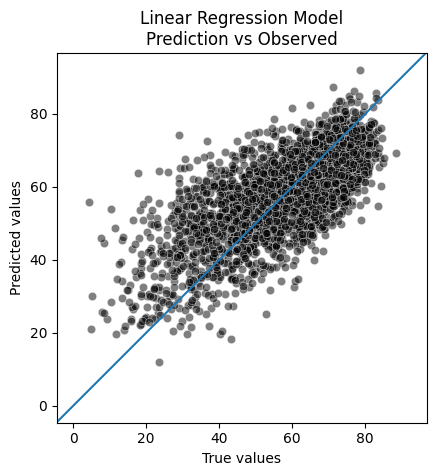

In [45]:
predicted_actual = {
        "True values": y_test.flatten(), "Predicted values": model.predict(pca.transform(X_test)).flatten()}
predicted_actual = pd.DataFrame(predicted_actual)



sns.scatterplot(data=predicted_actual,
                x="True values", y="Predicted values",
                color="black", alpha=0.5)
plt.axline((0, 0), slope=1, label="Perfect fit")
plt.axis('square')
_ = plt.title("Linear Regression Model\nPrediction vs Observed")

In [17]:
def connectMLFlow(MLFlowAddr):
    client = MlflowClient(tracking_uri=MLFlowAddr)
    mlflow.set_tracking_uri(MLFlowAddr)
    return client

In [18]:
client = connectMLFlow("http://172.27.0.1:5000")

In [ ]:
experiment_name = "VGG16 Model"
try:
    experiment_id = client.create_experiment(experiment_name)
except:
    experiment_id = client.get_experiment_by_name(experiment_name).experiment_id
    
experiment = mlflow.set_experiment(experiment_name)
run_name = "PCA"

In [ ]:
pca

In [53]:
start = time()
with mlflow.start_run(run_name=run_name) as run:
    run_id = run.info.run_id

    mlflow.sklearn.log_model(pca,"model/")
    mlflow.end_run()
end = time()
run_time = end - start

print ("Tempo para rodar essa célula: {}m {:.3f}s".format(int(run_time/60), run_time%60))

Tempo para rodar essa célula: 0m 25.959s


In [88]:
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

In [164]:
gbmodel = GradientBoostingRegressor(n_estimators=200)

In [165]:
gbmodel.fit(X_train, y_train.values.ravel())

GradientBoostingRegressor(n_estimators=200)

In [166]:
gby_pred_test = gbmodel.predict(X_test)
rmse, mae, r2 = eval_metrics(y_test, gby_pred_test)
print (f"Desempenho no conjunto de Testes (Validação)\nrmse:{rmse}    mae:{mae}    r2:{r2}")

gby_pred_train = gbmodel.predict(X_train)
rmse, mae, r2 = eval_metrics(y_train, gby_pred_train)
print (f"Desempenho no conjunto de Treino\nrmse:{rmse}    mae:{mae}    r2:{r2}")



Desempenho no conjunto de Testes (Validação)
rmse:11.261274963073541    mae:8.733927200777616    r2:0.46050877516276867
Desempenho no conjunto de Treino
rmse:8.771942188107671    mae:6.810216945556503    r2:0.6786231289448248
